In [1]:
# Libraries
import pandas as pd 
import numpy as np 
from dotenv import load_dotenv
import os
from binance.client import Client
import matplotlib.pyplot as plt

In [2]:
#Get API keys
load_dotenv()

api_key = os.getenv('BINANCE_API_KEY')
api_secret = os.getenv('BINANCE_API_SECRET')

In [3]:
# Extracting data 

client = Client(api_key, api_secret)

# Bitcoin Data
symbol = 'BTCUSDT'
interval = Client.KLINE_INTERVAL_5MINUTE
start_time = "30 days ago UTC" 

# Historical data
klines = client.get_historical_klines(symbol, interval, start_time)

# To DataFrame
df = pd.DataFrame(klines, columns=["date", "open", "high", "low", "close", "volume", "close_time", "quote_asset_volume", "number_of_trades", "taker_buy_base_asset_volume", "taker_buy_quote_asset_volume", "ignore"])
df['date'] = pd.to_datetime(df['date'], unit='ms')

# Only OHLCV
df = df[['date', 'open', 'high', 'low', 'close', 'volume']]

In [4]:
# Few analysis

#dtypes
print(df.dtypes)

#Describe
print(df.describe)

#head
df.head(10)

date      datetime64[ns]
open              object
high              object
low               object
close             object
volume            object
dtype: object
<bound method NDFrame.describe of                     date            open            high             low  \
0    2024-10-26 15:30:00  66937.37000000  66960.00000000  66872.01000000   
1    2024-10-26 15:35:00  66913.99000000  66952.00000000  66883.15000000   
2    2024-10-26 15:40:00  66935.99000000  67010.00000000  66935.99000000   
3    2024-10-26 15:45:00  66988.69000000  66988.69000000  66904.44000000   
4    2024-10-26 15:50:00  66919.99000000  66925.77000000  66881.12000000   
...                  ...             ...             ...             ...   
8635 2024-11-25 15:05:00  95555.99000000  95616.00000000  95055.96000000   
8636 2024-11-25 15:10:00  95073.69000000  95287.50000000  94525.00000000   
8637 2024-11-25 15:15:00  95252.49000000  95603.74000000  95136.01000000   
8638 2024-11-25 15:20:00  95400.00000000  

,date,open,high,low,close,volume
0,2024-10-26 15:30:00,66937.37000000,66960.00000000,66872.01000000,66913.99000000,58.21692000
1,2024-10-26 15:35:00,66913.99000000,66952.00000000,66883.15000000,66935.99000000,29.91977000
2,2024-10-26 15:40:00,66935.99000000,67010.00000000,66935.99000000,66988.70000000,65.65710000
3,2024-10-26 15:45:00,66988.69000000,66988.69000000,66904.44000000,66919.99000000,22.46069000
4,2024-10-26 15:50:00,66919.99000000,66925.77000000,66881.12000000,66881.13000000,17.70826000
5,2024-10-26 15:55:00,66881.12000000,66896.00000000,66866.51000000,66886.49000000,24.83999000
6,2024-10-26 16:00:00,66886.49000000,66930.58000000,66866.00000000,66912.97000000,32.22993000
7,2024-10-26 16:05:00,66912.97000000,66951.33000000,66886.23000000,66886.23000000,34.81144000
8,2024-10-26 16:10:00,66886.23000000,66903.74000000,66799.71000000,66829.33000000,109.13641000
9,2024-10-26 16:15:00,66829.33000000,66830.00000000,66788.00000000,66817.99000000,25.30992000


In [5]:
# Change object type to float
columns_to_convert = ['open', 'high', 'low', 'close', 'volume']
df[columns_to_convert] = df[columns_to_convert].astype(float)

In [6]:
#Volume round to 2f
df["volume"] = df['volume'].round(2)
df

,date,open,high,low,close,volume
0,2024-10-26 15:30:00,66937.37,66960.00,66872.01,66913.99,58.22
1,2024-10-26 15:35:00,66913.99,66952.00,66883.15,66935.99,29.92
2,2024-10-26 15:40:00,66935.99,67010.00,66935.99,66988.70,65.66
3,2024-10-26 15:45:00,66988.69,66988.69,66904.44,66919.99,22.46
4,2024-10-26 15:50:00,66919.99,66925.77,66881.12,66881.13,17.71
...,...,...,...,...,...,...
8635,2024-11-25 15:05:00,95555.99,95616.00,95055.96,95073.68,750.40
8636,2024-11-25 15:10:00,95073.69,95287.50,94525.00,95252.49,1346.55
8637,2024-11-25 15:15:00,95252.49,95603.74,95136.01,95400.00,644.54
8638,2024-11-25 15:20:00,95400.00,95620.00,95144.97,95619.99,459.64


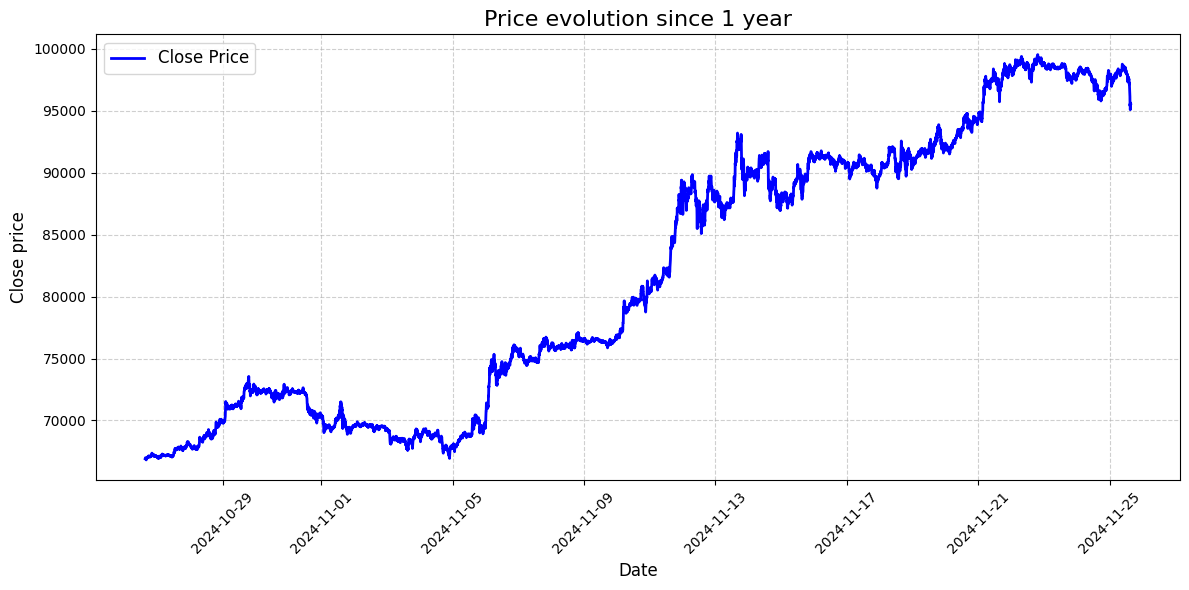

In [7]:
#Price evolution
plt.figure(figsize=(12, 6))
plt.plot(df['date'],df['close'], label='Close Price', color='blue', linewidth=2)


plt.title('Price evolution since 1 year', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close price', fontsize=12)
plt.xticks(rotation=45)
plt.legend(loc='upper left', fontsize=12)

#Grid
plt.grid(visible=True, linestyle='--', alpha=0.6)


plt.tight_layout() 
plt.show()

In [8]:
#To CSV

df.to_csv(r"C:\Users\Proab\OneDrive\Bureau\Dev projects\crypto-trading-strategy-1\data\BTC_USDT_data.csv", index=False)